In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('/home/hacker_bunny/Files/Projects/data_science_projects/unicorn_dataset_analysis/dataset/Unicorn_Companies.csv')
dataset.head()

In [ ]:
dataset.isna().sum()

In [ ]:
def country_vs_company_vis(data,type):
    fig = px.pie(data, 
             names='Country', 
             values=type, 
             hover_data=[type],
             title=type, 
             labels={'Country': 'Country Name'},   
             color_discrete_sequence=px.colors.qualitative.Dark24,
             hole=0.3
             )

    # Update layout
    fig.update_layout(
        title_font_size=20,  # Title font size
        title_font_family='Arial',  # Title font family
        title_x=0.5,  # Title position
        showlegend=True,  # Show legend
        legend_title='Countries',  # Legend title
        legend_font_size=12,  # Legend font size
        legend_tracegroupgap=10,  # Gap between legend items
        width=800,  # Overall width
        height=500,  # Overall height
        )
    fig.show()

In [ ]:
def company_vs_valuation_vis(data,type,Range,size):
    plt.figure(figsize=size)
    sns.set_theme(context='paper',style='whitegrid',palette='Spectral')
    sns.set_color_codes('deep')
    sns.barplot(data,
                x='Company',y='Valuation',
                hue='Country',
                )
    plt.xticks(rotation=90)
    plt.yticks(Range)
    plt.xlabel('Company', fontsize=14)
    plt.ylabel('Valuation in Billion $', fontsize=14)
    plt.title(f'Distribution of {type} Valuation', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:

cleaned_dataset=dataset.drop(columns=['Date Joined','Select Inverstors','Deal Terms','City']).rename(columns={'Valuation ($B)':'Valuation'}).fillna('Unknown')
cleaned_dataset['Valuation']=cleaned_dataset['Valuation'].str.replace("$","").astype(float)
cleaned_dataset

# Now let us see which country has the most unicorn companies

In [ ]:
country_count=cleaned_dataset['Country'].value_counts().reset_index().rename(columns={'count':'Number of Unicorn Companies'})
others=country_count[country_count['Number of Unicorn Companies']<7]['Number of Unicorn Companies'].sum()
new_row={'Country':'Others','Number of Unicorn Companies':int(others)}
country_count=country_count[country_count['Number of Unicorn Companies']>=7]
country_count.loc[len(country_count)]=new_row
country_count

In [ ]:
country_vs_company_vis(country_count,'Number of Unicorn Companies')


In [ ]:
cleaned_dataset['Industry'].unique()#Ai,Fintech,Cybersecurity,Data management and analytics

In [ ]:
working_industries=['Artificial intelligence''Artificial Intelligence','Cybersecurity','Fintech']
filtered_dataset=cleaned_dataset[dataset['Industry'].isin(working_industries)]
filtered_dataset

In [ ]:
def other_row(data,company,no):
    data_country=data['Country'].value_counts().reset_index().rename(columns={'count':f'Number of {company} Unicorn Companies'})
    others=data_country[data_country[f'Number of {company} Unicorn Companies']<no][f'Number of {company} Unicorn Companies'].sum()
    new_row={'Country':'Others',f'Number of {company} Unicorn Companies':int(others)}
    data_country=data_country[data_country[f'Number of {company} Unicorn Companies']>=no]
    data_country.loc[len(data_country)]=new_row
    return data_country


# Fintech unicorn companies

In [ ]:
dataset_Fintech_subset=cleaned_dataset[dataset['Industry'].isin(['Fintech'])].drop(columns=['Industry'])
dataset_Fintech_subset

In [ ]:
dataset_Fintech_subset['Country'].unique()

### Country Distribution of Fintech Unicorn Companies
 Let's determine which country hosts the most fintech unicorn companies. This analysis will reveal the leading regions for high-value fintech startups.

In [ ]:
fintech_country=other_row(dataset_Fintech_subset,'Fintech',2)
fintech_country

In [ ]:
country_vs_company_vis(fintech_country,'Number of Fintech Unicorn Companies')

## Most valued Fintech company


In [ ]:
data_sorted=dataset_Fintech_subset.sort_values(by='Valuation',ascending=False).reset_index(drop=True)
fintech_valuation=data_sorted[data_sorted['Valuation']>3]
fintech_valuation=fintech_valuation.iloc[:,0:3]
fintech_valuation

In [ ]:
company_vs_valuation_vis(fintech_valuation,'Fintech',Range=range(0,101,10),size=(12,8))

In [ ]:
dataset_Fintech_subset.loc[(dataset_Fintech_subset['Company'] == 'Stripe') | (dataset_Fintech_subset['Company'] == 'Klarna') | (dataset_Fintech_subset['Company'] == 'Checkout.com')]

## Least valued Fintech Company 

In [ ]:
data_sorted=dataset_Fintech_subset.sort_values(by='Valuation',ascending=True).reset_index(drop=True)
fintech_valuation_l=data_sorted[data_sorted['Valuation']<1.5]
fintech_valuation_l=fintech_valuation_l.iloc[:,0:3]
fintech_valuation_l

In [ ]:
company_vs_valuation_vis(fintech_valuation_l,'Fintech',np.arange(0,2,0.1),(12,8))

### So from the above graph we can see that the lowest valuation is $1 Billion dollars, and there is many unicorns let us analyse all of them

In [ ]:
l_valuation=dataset_Fintech_subset.loc[dataset_Fintech_subset['Valuation']==1]
l_valuation

In [ ]:
country_l_valuation=l_valuation['Country'].value_counts().reset_index().rename(columns={'count':'Least Valued Fintech Companies'})
country_vs_company_vis(country_l_valuation,'Least Valued Fintech Companies')

In [ ]:
l_valuation['Founded Year'].value_counts().reset_index()

In [ ]:
l_valuation['Financial Stage'].unique()

In [ ]:
l_valuation['Investors Count'].value_counts()

# Artificial Intelligence based Unicorn Companies

In [ ]:
ai=['Artificial Intelligence','Artificial intelligence']
dataset_ai_subset=cleaned_dataset[cleaned_dataset['Industry'].isin(ai)]
dataset_ai_subset['Industry']=dataset_ai_subset['Industry'].replace({'Artificial Intelligence':'AI','Artificial intelligence':'AI'})
dataset_ai_subset

### Country distribution of Artificial Intelligence based Unicorn companies

In [36]:
dataset_ai_subset['Country'].unique()

array(['China', 'United States', 'United Kingdom', 'Japan', 'Israel',
       'Bermuda', 'Chile', 'Estonia', 'Canada', 'France', 'Brazil'],
      dtype=object)

In [42]:
country_ai_count=dataset_ai_subset['Country'].value_counts().reset_index().rename(columns={'count':'Number of AI based Unicorn Companies'})
country_ai_count

,Country,Number of AI based Unicorn Companies
0,United States,43
1,China,19
2,United Kingdom,3
3,Israel,3
4,Chile,2
5,Canada,2
6,France,2
7,Japan,1
8,Bermuda,1
9,Estonia,1


In [43]:
country_vs_company_vis(country_ai_count,'Number of AI based Unicorn Companies')

## Valuation analysis of  Artificial Intelligence based Unicorns


In [44]:
dataset_ai_subset['Valuation'].unique()

array([140.  ,  12.4 ,   7.3 ,   7.25,   6.8 ,   6.3 ,   5.2 ,   5.3 ,
         5.  ,   4.6 ,   4.1 ,   4.  ,   3.5 ,   3.32,   2.92,   2.77,
         2.7 ,   2.5 ,   2.3 ,   2.2 ,   2.18,   2.17,   2.1 ,   2.  ,
         1.8 ,   1.7 ,   1.6 ,   1.5 ,   1.4 ,   1.35,   1.31,   1.3 ,
         1.2 ,   1.19,   1.15,   1.  ,   1.03])

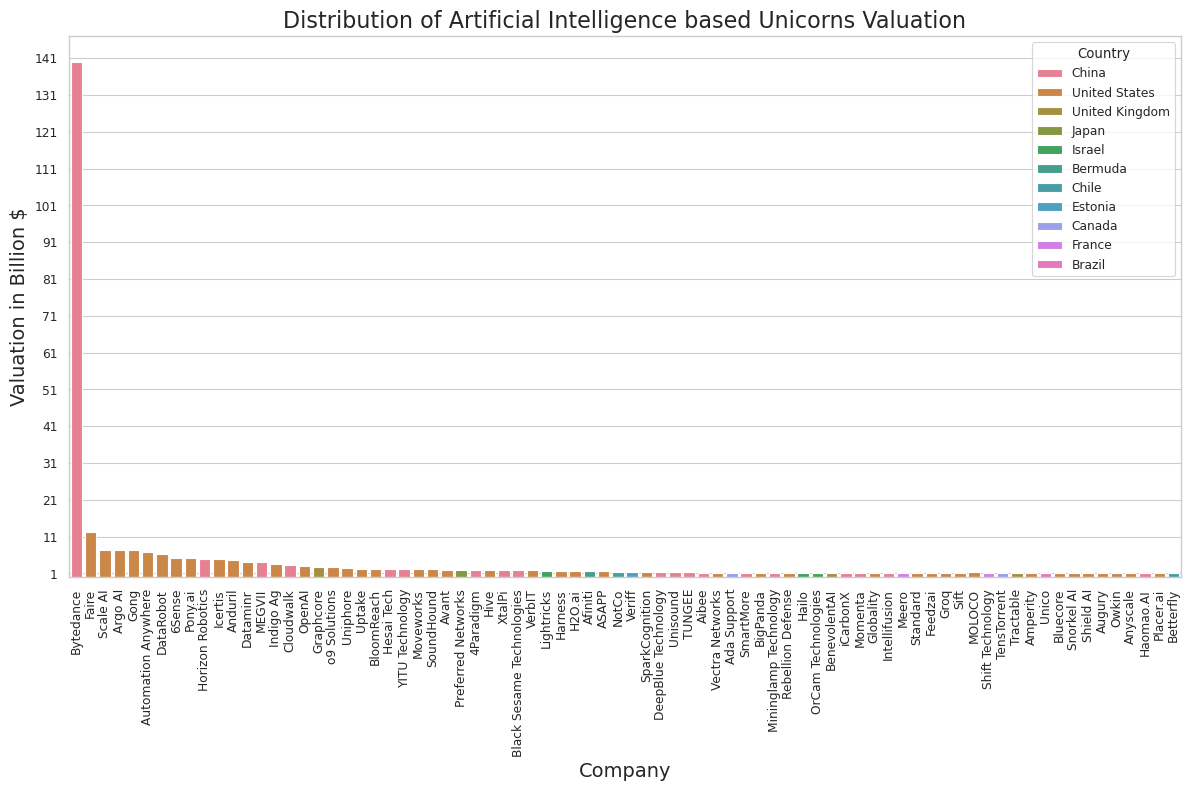

In [52]:
company_vs_valuation_vis(dataset_ai_subset,'Artificial Intelligence based Unicorns',range(1,151,10),(12,8))

### Most Valued Artificial Intelligence based Unicorns

In [56]:
#The most valued Unicorn amongst all is Bytedance with valuation $140 Billion,then there is Faire with $12.4 Billion and then Scale AI with #7.25 billion 
most_valued_ai=dataset_ai_subset[dataset_ai_subset['Company'].isin(['Bytedance','Faire','Scale AI'])]
most_valued_ai

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
0,Bytedance,140.0,China,AI,2012.0,$7.44B,IPO,28.0,5.0
27,Faire,12.4,United States,AI,2017.0,$1.096B,Unknown,14.0,Unknown
80,Scale AI,7.3,United States,AI,2018.0,Unknown,Unknown,1.0,Unknown


### Least Valued Artificial Intelligence based Unicorns

In [57]:
low_valued_ai=dataset_ai_subset[dataset_ai_subset['Valuation'].isin([1])]
low_valued_ai

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
754,Hailo,1.0,Israel,AI,2017.0,$217M,Unknown,18.0,Unknown
794,BenevolentAI,1.0,United Kingdom,AI,2013.0,$345.55M,Unknown,7.0,Unknown
803,iCarbonX,1.0,China,AI,2015.0,$199M,Acq,3.0,3.0
830,Momenta,1.0,China,AI,2016.0,$1.283B,Unknown,28.0,Unknown
838,Globality,1.0,United States,AI,2015.0,$310.3M,Unknown,20.0,Unknown
840,Intellifusion,1.0,China,AI,2014.0,$287.85M,Unknown,36.0,Unknown
847,Meero,1.0,France,AI,2016.0,$297.5M,Unknown,10.0,Unknown
876,Standard,1.0,United States,AI,2017.0,$235.62M,Unknown,11.0,Unknown
885,Feedzai,1.0,United States,AI,2009.0,$277.8M,Unknown,10.0,Unknown
892,Groq,1.0,United States,AI,2016.0,$362.55M,Unknown,14.0,Unknown
